Lefki Ioanna (Eleanna) Panagiotou 

ID: 908 589 7206

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Reshape into image tensor
            nn.Unflatten(1, (1, 28, 28)),
            
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=0),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(2, stride=2),
         
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=0),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(2, stride=2),
            
            nn.Flatten(),
            
            nn.Linear(4 * 4 * 64, 1024),
            nn.LeakyReLU(0.01),
            
            nn.Linear(1024, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Unflatten(dim=1, unflattened_size=(1, 28, 28))
    (1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8

# Tools for training

In [58]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [59]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [60]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [61]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [62]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [63]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [64]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

### Question 1c: GAN + CNN in discriminator

118it [00:09, 12.73it/s]                         


Epoch 1 of 100
Generator loss: 23.01775742, Discriminator loss: 0.29639187


118it [00:09, 12.36it/s]                         


Epoch 2 of 100
Generator loss: 3.25482488, Discriminator loss: 0.55036634


118it [00:09, 12.33it/s]                         


Epoch 3 of 100
Generator loss: 2.63323355, Discriminator loss: 0.67628640


118it [00:09, 12.41it/s]                         


Epoch 4 of 100
Generator loss: 2.49438381, Discriminator loss: 0.68002617


118it [00:09, 12.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


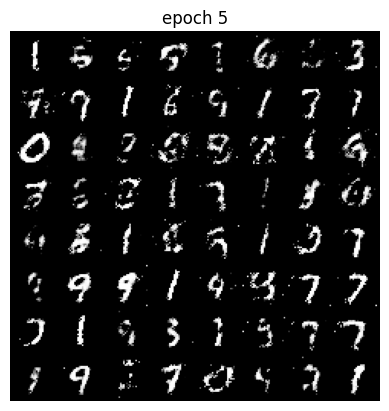

Epoch 5 of 100
Generator loss: 2.36245155, Discriminator loss: 0.70072544


118it [00:09, 12.30it/s]                         


Epoch 6 of 100
Generator loss: 2.33731818, Discriminator loss: 0.68521512


118it [00:09, 12.34it/s]                         


Epoch 7 of 100
Generator loss: 2.24055743, Discriminator loss: 0.69656557


118it [00:09, 12.58it/s]                         


Epoch 8 of 100
Generator loss: 2.17659879, Discriminator loss: 0.72491431


118it [00:09, 12.91it/s]                         


Epoch 9 of 100
Generator loss: 2.20604539, Discriminator loss: 0.72064215


118it [00:09, 12.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


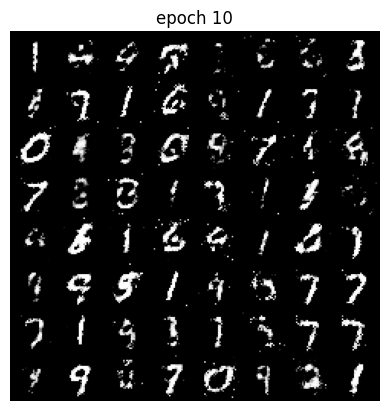

Epoch 10 of 100
Generator loss: 2.19501328, Discriminator loss: 0.73504692


118it [00:09, 12.08it/s]                         


Epoch 11 of 100
Generator loss: 2.08195567, Discriminator loss: 0.76381367


118it [00:09, 12.16it/s]                         


Epoch 12 of 100
Generator loss: 2.05654550, Discriminator loss: 0.76351720


118it [00:09, 12.27it/s]                         


Epoch 13 of 100
Generator loss: 2.04566479, Discriminator loss: 0.79964912


118it [00:09, 12.36it/s]                         


Epoch 14 of 100
Generator loss: 1.98711717, Discriminator loss: 0.77990007


118it [00:09, 12.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


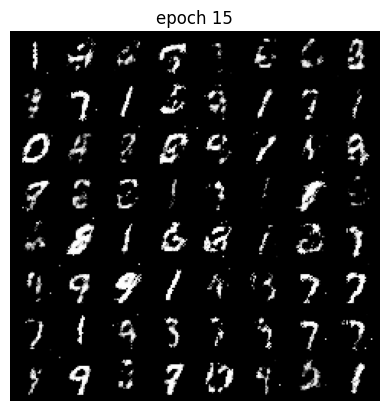

Epoch 15 of 100
Generator loss: 1.95972681, Discriminator loss: 0.77482098


118it [00:09, 12.08it/s]                         


Epoch 16 of 100
Generator loss: 2.00165677, Discriminator loss: 0.78608245


118it [00:09, 12.99it/s]                         


Epoch 17 of 100
Generator loss: 1.99224114, Discriminator loss: 0.83094442


118it [00:09, 13.04it/s]                         


Epoch 18 of 100
Generator loss: 1.90868461, Discriminator loss: 0.79109055


118it [00:09, 12.98it/s]                         


Epoch 19 of 100
Generator loss: 1.92784989, Discriminator loss: 0.80231404


118it [00:09, 13.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


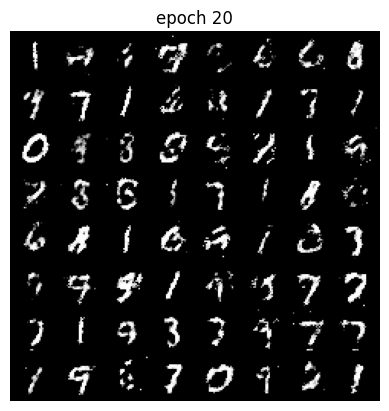

Epoch 20 of 100
Generator loss: 1.87079287, Discriminator loss: 0.83081120


118it [00:09, 12.92it/s]                         


Epoch 21 of 100
Generator loss: 1.86484325, Discriminator loss: 0.83256543


118it [00:09, 13.08it/s]                         


Epoch 22 of 100
Generator loss: 1.87290573, Discriminator loss: 0.86324143


118it [00:09, 13.08it/s]                         


Epoch 23 of 100
Generator loss: 1.85018849, Discriminator loss: 0.84193462


118it [00:09, 13.10it/s]                         


Epoch 24 of 100
Generator loss: 1.92951250, Discriminator loss: 0.81645185


118it [00:09, 12.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


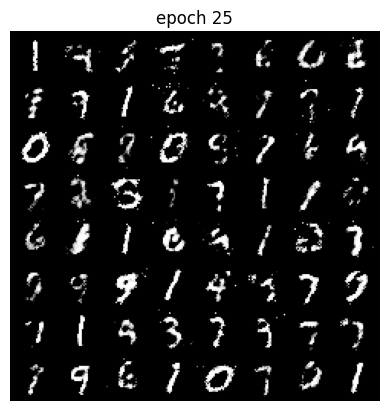

Epoch 25 of 100
Generator loss: 1.80473411, Discriminator loss: 0.85623085


118it [00:09, 13.10it/s]                         


Epoch 26 of 100
Generator loss: 1.79972160, Discriminator loss: 0.84251773


118it [00:09, 12.36it/s]                         


Epoch 27 of 100
Generator loss: 1.77278638, Discriminator loss: 0.86306703


118it [00:09, 12.11it/s]                         


Epoch 28 of 100
Generator loss: 1.80458331, Discriminator loss: 0.87554812


118it [00:09, 11.98it/s]                         


Epoch 29 of 100
Generator loss: 1.74011016, Discriminator loss: 0.90344399


118it [00:09, 12.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


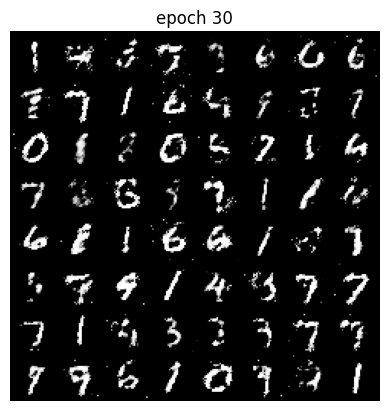

Epoch 30 of 100
Generator loss: 1.68975747, Discriminator loss: 0.91421574


118it [00:09, 12.26it/s]                         


Epoch 31 of 100
Generator loss: 1.72895551, Discriminator loss: 0.88785589


118it [00:09, 12.23it/s]                         


Epoch 32 of 100
Generator loss: 1.76500511, Discriminator loss: 0.89564943


118it [00:09, 12.24it/s]                         


Epoch 33 of 100
Generator loss: 1.73155999, Discriminator loss: 0.89500558


118it [00:09, 12.00it/s]                         


Epoch 34 of 100
Generator loss: 1.68124998, Discriminator loss: 0.89450359


118it [00:09, 11.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


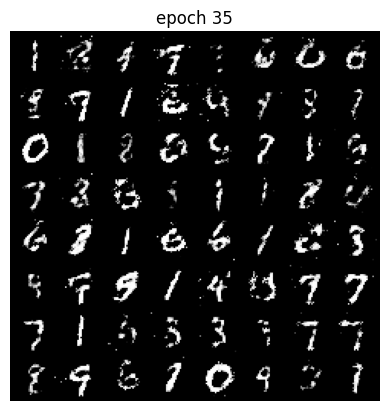

Epoch 35 of 100
Generator loss: 1.65937269, Discriminator loss: 0.90721446


118it [00:10, 11.76it/s]                         


Epoch 36 of 100
Generator loss: 1.71494257, Discriminator loss: 0.91096699


118it [00:09, 12.00it/s]                         


Epoch 37 of 100
Generator loss: 1.59464228, Discriminator loss: 0.92394298


118it [00:09, 12.07it/s]                         


Epoch 38 of 100
Generator loss: 1.54300869, Discriminator loss: 0.95425385


118it [00:09, 12.19it/s]                         


Epoch 39 of 100
Generator loss: 1.64893758, Discriminator loss: 0.92701536


118it [00:09, 12.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


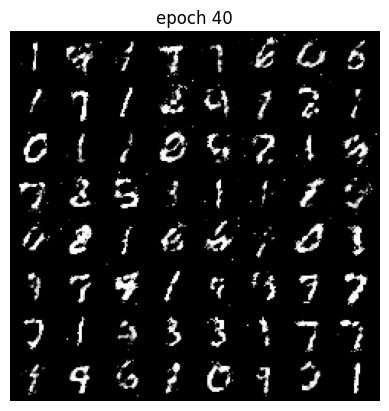

Epoch 40 of 100
Generator loss: 1.65510786, Discriminator loss: 0.92886287


118it [00:09, 12.02it/s]                         


Epoch 41 of 100
Generator loss: 1.63105404, Discriminator loss: 0.94493079


118it [00:09, 12.37it/s]                         


Epoch 42 of 100
Generator loss: 1.63730633, Discriminator loss: 0.93882066


118it [00:09, 11.93it/s]                         


Epoch 43 of 100
Generator loss: 1.64919090, Discriminator loss: 0.92798227


118it [00:09, 12.16it/s]                         


Epoch 44 of 100
Generator loss: 1.57602620, Discriminator loss: 0.95098716


118it [00:09, 11.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


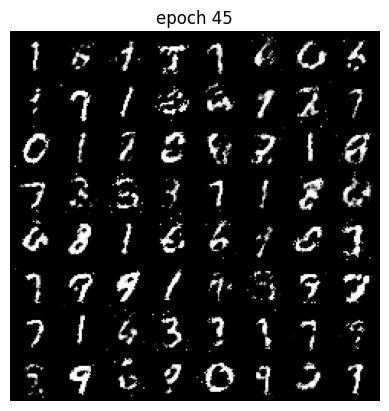

Epoch 45 of 100
Generator loss: 1.64026809, Discriminator loss: 0.93614465


118it [00:10, 11.76it/s]                         


Epoch 46 of 100
Generator loss: 1.62178659, Discriminator loss: 0.93146604


118it [00:09, 12.30it/s]                         


Epoch 47 of 100
Generator loss: 1.63275468, Discriminator loss: 0.96621788


118it [00:09, 12.34it/s]                         


Epoch 48 of 100
Generator loss: 1.58999491, Discriminator loss: 0.93509626


118it [00:09, 12.07it/s]                         


Epoch 49 of 100
Generator loss: 1.67225802, Discriminator loss: 0.91767848


118it [00:09, 11.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


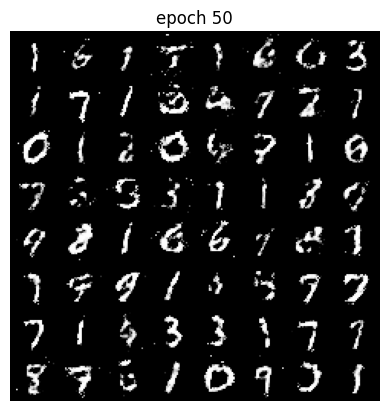

Epoch 50 of 100
Generator loss: 1.65001464, Discriminator loss: 0.93412799


118it [00:09, 11.98it/s]                         


Epoch 51 of 100
Generator loss: 1.67113936, Discriminator loss: 0.90551603


118it [00:09, 11.96it/s]                         


Epoch 52 of 100
Generator loss: 1.61158240, Discriminator loss: 0.93985349


118it [00:09, 11.92it/s]                         


Epoch 53 of 100
Generator loss: 1.56369638, Discriminator loss: 0.94941753


118it [00:09, 11.97it/s]                         


Epoch 54 of 100
Generator loss: 1.62766683, Discriminator loss: 0.94219309


118it [00:09, 11.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


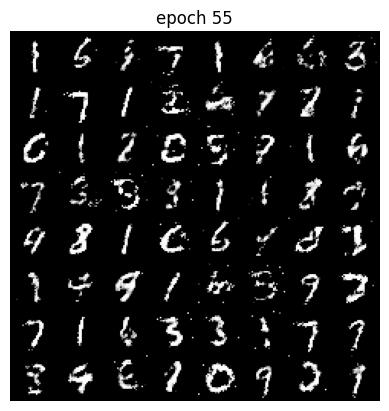

Epoch 55 of 100
Generator loss: 1.51604283, Discriminator loss: 0.98068815


118it [00:09, 11.96it/s]                         


Epoch 56 of 100
Generator loss: 1.54779482, Discriminator loss: 0.98281187


118it [00:09, 11.94it/s]                         


Epoch 57 of 100
Generator loss: 1.56184673, Discriminator loss: 0.95290989


118it [00:10, 11.69it/s]                         


Epoch 58 of 100
Generator loss: 1.58045292, Discriminator loss: 0.97028065


118it [00:09, 11.85it/s]                         


Epoch 59 of 100
Generator loss: 1.51902711, Discriminator loss: 0.98730099


118it [00:09, 12.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


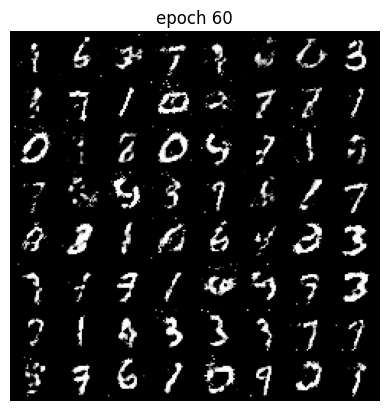

Epoch 60 of 100
Generator loss: 1.53752339, Discriminator loss: 0.97803891


118it [00:09, 12.07it/s]                         


Epoch 61 of 100
Generator loss: 1.53840327, Discriminator loss: 0.98133576


118it [00:09, 12.26it/s]                         


Epoch 62 of 100
Generator loss: 1.49563301, Discriminator loss: 0.99078858


118it [00:09, 12.27it/s]                         


Epoch 63 of 100
Generator loss: 1.49911714, Discriminator loss: 0.97322178


118it [00:09, 12.00it/s]                         


Epoch 64 of 100
Generator loss: 1.46536875, Discriminator loss: 0.99944961


118it [00:09, 12.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


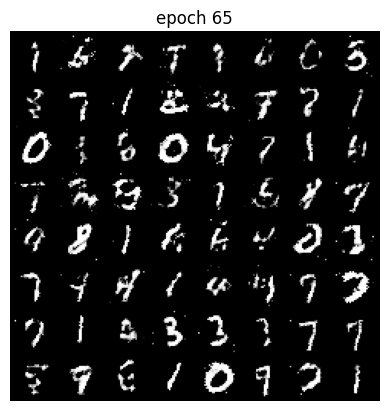

Epoch 65 of 100
Generator loss: 1.51127207, Discriminator loss: 0.99716967


118it [00:09, 12.03it/s]                         


Epoch 66 of 100
Generator loss: 1.49612045, Discriminator loss: 0.99331146


118it [00:09, 12.22it/s]                         


Epoch 67 of 100
Generator loss: 1.45263767, Discriminator loss: 1.01471364


118it [00:09, 12.20it/s]                         


Epoch 68 of 100
Generator loss: 1.47351778, Discriminator loss: 1.00715411


118it [00:09, 11.93it/s]                         


Epoch 69 of 100
Generator loss: 1.41970968, Discriminator loss: 1.02536345


118it [00:09, 12.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


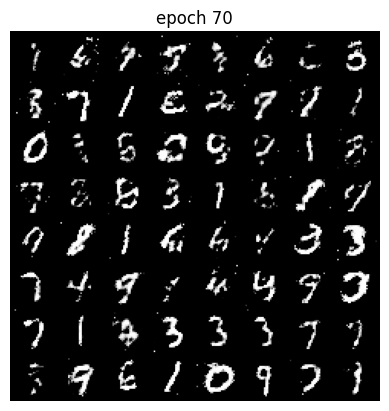

Epoch 70 of 100
Generator loss: 1.41587567, Discriminator loss: 1.01842153


118it [00:09, 12.00it/s]                         


Epoch 71 of 100
Generator loss: 1.42991698, Discriminator loss: 1.03623688


118it [00:09, 12.01it/s]                         


Epoch 72 of 100
Generator loss: 1.41753149, Discriminator loss: 1.01322198


118it [00:09, 12.15it/s]                         


Epoch 73 of 100
Generator loss: 1.39808667, Discriminator loss: 1.02773130


118it [00:09, 12.09it/s]                         


Epoch 74 of 100
Generator loss: 1.44642723, Discriminator loss: 1.00591445


118it [00:09, 12.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


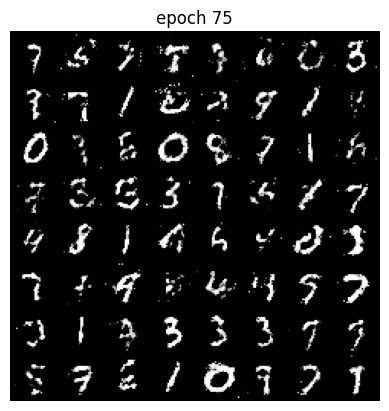

Epoch 75 of 100
Generator loss: 1.37753689, Discriminator loss: 1.06280529


118it [00:09, 12.05it/s]                         


Epoch 76 of 100
Generator loss: 1.38524425, Discriminator loss: 1.03700006


118it [00:09, 12.05it/s]                         


Epoch 77 of 100
Generator loss: 1.43031609, Discriminator loss: 1.01349342


118it [00:09, 12.01it/s]                         


Epoch 78 of 100
Generator loss: 1.42623174, Discriminator loss: 1.01644468


118it [00:09, 11.91it/s]                         


Epoch 79 of 100
Generator loss: 1.41558051, Discriminator loss: 1.01520383


118it [00:09, 11.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


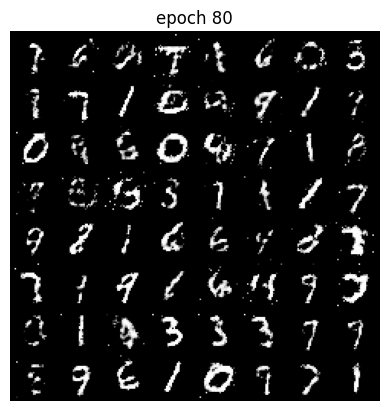

Epoch 80 of 100
Generator loss: 1.41404760, Discriminator loss: 1.02177072


118it [00:09, 11.91it/s]                         


Epoch 81 of 100
Generator loss: 1.42341125, Discriminator loss: 1.02618372


118it [00:09, 12.13it/s]                         


Epoch 82 of 100
Generator loss: 1.37273896, Discriminator loss: 1.04613602


118it [00:09, 11.83it/s]                         


Epoch 83 of 100
Generator loss: 1.37804508, Discriminator loss: 1.03967929


118it [00:09, 12.08it/s]                         


Epoch 84 of 100
Generator loss: 1.39420199, Discriminator loss: 1.02900147


118it [00:09, 12.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


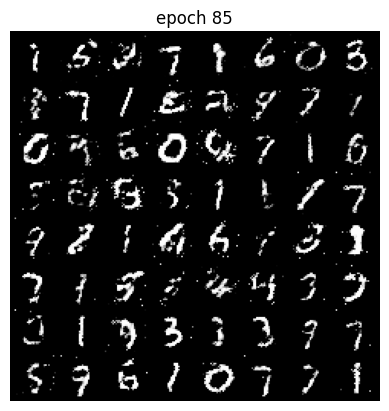

Epoch 85 of 100
Generator loss: 1.37026131, Discriminator loss: 1.04579270


118it [00:09, 12.14it/s]                         


Epoch 86 of 100
Generator loss: 1.36919343, Discriminator loss: 1.04173684


118it [00:09, 12.11it/s]                         


Epoch 87 of 100
Generator loss: 1.34692740, Discriminator loss: 1.04757929


118it [00:09, 12.06it/s]                         


Epoch 88 of 100
Generator loss: 1.38227963, Discriminator loss: 1.04463542


118it [00:09, 12.17it/s]                         


Epoch 89 of 100
Generator loss: 1.38615263, Discriminator loss: 1.04095316


118it [00:09, 11.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


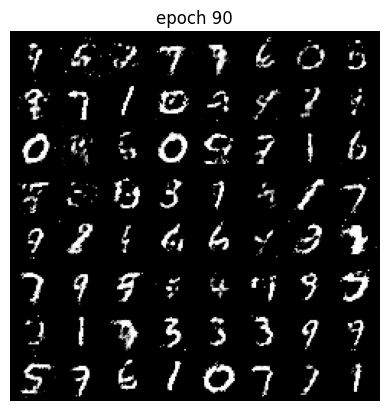

Epoch 90 of 100
Generator loss: 1.34361255, Discriminator loss: 1.04082239


118it [00:09, 12.09it/s]                         


Epoch 91 of 100
Generator loss: 1.41557014, Discriminator loss: 1.04507434


118it [00:09, 12.20it/s]                         


Epoch 92 of 100
Generator loss: 1.34317374, Discriminator loss: 1.05792487


118it [00:09, 12.20it/s]                         


Epoch 93 of 100
Generator loss: 1.33836114, Discriminator loss: 1.04764569


118it [00:09, 12.16it/s]                         


Epoch 94 of 100
Generator loss: 1.33971584, Discriminator loss: 1.06460154


118it [00:09, 11.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


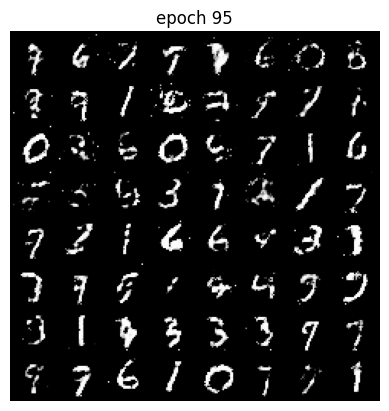

Epoch 95 of 100
Generator loss: 1.29242837, Discriminator loss: 1.08909953


118it [00:09, 11.94it/s]                         


Epoch 96 of 100
Generator loss: 1.30821609, Discriminator loss: 1.06738758


118it [00:09, 12.13it/s]                         


Epoch 97 of 100
Generator loss: 1.29420149, Discriminator loss: 1.07831597


118it [00:09, 12.07it/s]                         


Epoch 98 of 100
Generator loss: 1.28394341, Discriminator loss: 1.09026265


118it [00:09, 12.03it/s]                         


Epoch 99 of 100
Generator loss: 1.32667673, Discriminator loss: 1.07656312


118it [00:09, 12.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


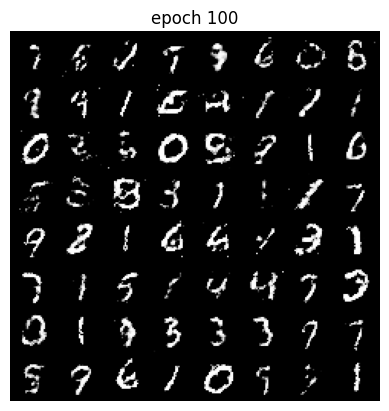

Epoch 100 of 100
Generator loss: 1.31187522, Discriminator loss: 1.07512367


In [31]:
def discriminator_loss(output_real, output_fake):
    ############ YOUR CODE HERE ##########
    real_label = label_real(output_real.size(0))
    fake_label = label_fake(output_fake.size(0)) 

    loss_real = criterion(output_real, real_label)
    loss_fake = criterion(output_fake, fake_label)
    total_loss = loss_real + loss_fake

    return total_loss, loss_real, loss_fake
    ######################################
    
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
  
    loss = criterion(output, true_label)

    return loss 

    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        image, _ = data
        image = image.to(device)
        b_size = len(image)

        # run the discriminator for k number of steps
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            # train the discriminator network
            optim_d.zero_grad()

            output_real = discriminator(data_real)
            output_fake = discriminator(data_fake)
            total_loss, loss_real, loss_fake = discriminator_loss(output_real, output_fake)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()

            loss_d += total_loss

        data_fake = generator(create_noise(b_size, nz))
        # train the generator network
        optim_g.zero_grad()
        true_label = label_real(b_size)
        output_fake = discriminator(data_fake)
        loss = generator_loss(output_fake, true_label)
        loss_g += loss
        loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        # save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
        save_generator_image(generated_img, f"outputs_3/gen_img{epoch+1}.png")
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    # save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    save_generator_image(generated_img, f"outputs_3/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [32]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_3/generator.pth')

DONE TRAINING


In [33]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_3/generator_images.gif', imgs)

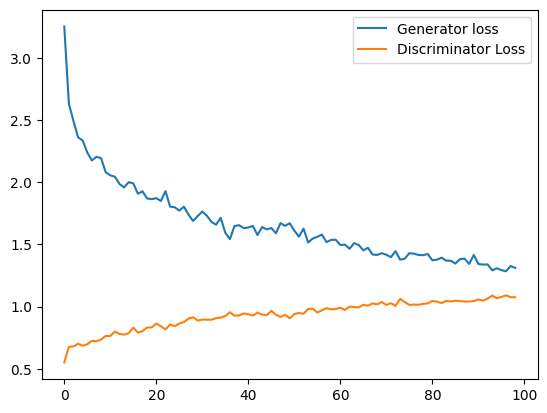

In [35]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_3/generator_images.gif', imgs)
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(torch.tensor(losses_g[1:]).cpu().detach().numpy(), label='Generator loss')
plt.plot(torch.tensor(losses_d[1:]).cpu().detach().numpy(), label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_3/loss.png')